* The NumPy allows us to work with numbers in an array which helps us with our dataframes [(NumPy, 2021)](https://https://numpy.org/doc/stable/index.html)
* The pandas library allows us to manipulate dataframes[(Pandas, 2021)](https://pandas.pydata.org/) 
* The seaborn library allows us to visualise the plots[(Seaborn, 2021)
](https://seaborn.pydata.org/whatsnew.html) 
* The statsmodels library allows us to obtain regression statistics [(Statsmodels,2019)](https://https://www.statsmodels.org/stable/index.html)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.formula.api as smf

df = pd.read_csv("data/polling_site_data/clean_precincts_with_polling_site.csv")
df.head()

Unnamed: 0  ... Polling Sites
0           1  ...             1
1           2  ...             1
2           3  ...             1
3           4  ...             1
4           5  ...             1

[5 rows x 17 columns]

The following method of is adapted from: [(Python For Data Science, 2022)](https://pythonfordatascienceorg.wordpress.com/logistic-regression-python)

1. Producing the log(odd) linear plot 

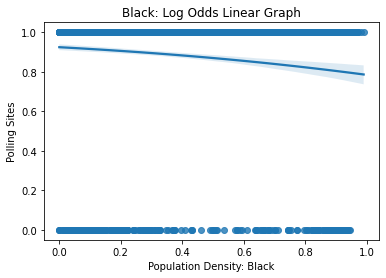

In [ ]:
black = sns.regplot(x = df.iloc[:,12], y = df.iloc[:,16], data=df, logistic= True).set_title("Black: Log Odds Linear Graph")



2. Finding regression statistics of log(odd) plots

In [ ]:
b = df.iloc[:,12]
poll = df.iloc[:,16]


In [ ]:
model= smf.logit(formula="b~poll", data= df).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.572453
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      b   No. Observations:                 2685
Model:                          Logit   Df Residuals:                     2683
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                -0.09929
Time:                        16:27:11   Log-Likelihood:                -1537.0
converged:                       True   LL-Null:                       -1398.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3939      0.118     -3.335      0.001      -0.625      -0.162
poll          -0.4628      0.126     -3.664      0.000      -0.710      -0.215
==============================================================================
"""

3. Obtaining the odds ratio, z-value, and the 95% Confidence Interval 

In [ ]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

The procedures for log(odds) plot and obtaining its regression statistics is repeated for each racial group


1. Hispanics

Optimization terminated successfully.
         Current function value: 0.144547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      h   No. Observations:                 2685
Model:                          Logit   Df Residuals:                     2683
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                  -3.704
Time:                        16:28:04   Log-Likelihood:                -388.11
converged:                       True   LL-Null:                       -82.506
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3599      0.206    -11.438      0.000      -2.764      -1.956
poll          -0.0261      0.219     -0.119      0.905      -0.455       0.403
==============================================================================
"""

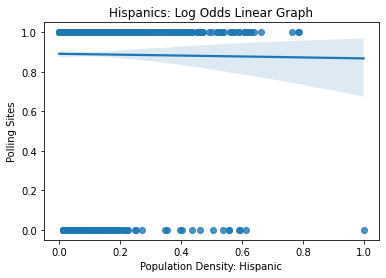

In [ ]:
hispanics = sns.regplot(x = df.iloc[:,10], y = df.iloc[:,16], data=df, logistic= True).set_title("Hispanics: Log Odds Linear Graph")
h = df.iloc[:,10]
poll = df.iloc[:,16]
model= smf.logit(formula="h~poll", data= df).fit()
model.summary()

In [ ]:


model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

OR       z-value      2.5%     97.5%
Intercept  0.094428  2.685609e-30  0.063021  0.141487
poll       0.974226  9.051258e-01  0.634131  1.496720

2. White

Optimization terminated successfully.
         Current function value: 0.685193
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      w   No. Observations:                 2685
Model:                          Logit   Df Residuals:                     2683
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                0.004490
Time:                        16:28:58   Log-Likelihood:                -1839.7
converged:                       True   LL-Null:                       -1848.0
Covariance Type:            nonrobust   LLR p-value:                 4.630e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3458      0.118     -2.940      0.003      -0.576      -0.115
poll           0.5146      0.125      4.132      0.000       0.271       0.759
==============================================================================
"""

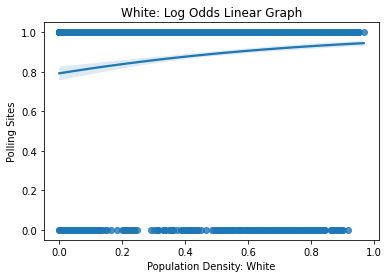

In [ ]:
white = sns.regplot(x = df.iloc[:,11], y = df.iloc[:,16], data=df, logistic= True).set_title("White: Log Odds Linear Graph")
w = df.iloc[:,11]
poll = df.iloc[:,16]
model= smf.logit(formula="w~poll", data= df).fit()
model.summary()


In [ ]:

model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds


OR   z-value      2.5%     97.5%
Intercept  0.707672  0.003277  0.562001  0.891101
poll       1.673048  0.000036  1.310632  2.135679

3. Black

Optimization terminated successfully.
         Current function value: 0.572453
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      b   No. Observations:                 2685
Model:                          Logit   Df Residuals:                     2683
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                -0.09929
Time:                        16:29:39   Log-Likelihood:                -1537.0
converged:                       True   LL-Null:                       -1398.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3939      0.118     -3.335      0.001      -0.625      -0.162
poll          -0.4628      0.126     -3.664      0.000      -0.710      -0.215
==============================================================================
"""

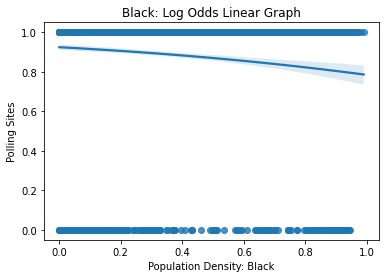

In [ ]:
black = sns.regplot(x = df.iloc[:,12], y = df.iloc[:,16], data=df, logistic= True).set_title("Black: Log Odds Linear Graph")
b = df.iloc[:,12]
poll = df.iloc[:,16]
model= smf.logit(formula="b~poll", data= df).fit()
model.summary()

In [ ]:


model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds


OR   z-value      2.5%     97.5%
Intercept  0.674431  0.000853  0.535059  0.850108
poll       0.629521  0.000248  0.491473  0.806344

4. Asian

Optimization terminated successfully.
         Current function value: 0.686619
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      a   No. Observations:                 2685
Model:                          Logit   Df Residuals:                     2683
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                0.002418
Time:                        16:29:58   Log-Likelihood:                -1843.6
converged:                       True   LL-Null:                       -1848.0
Covariance Type:            nonrobust   LLR p-value:                  0.002796
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1906      0.045      4.250      0.000       0.103       0.279
poll          -2.3134      0.672     -3.442      0.001      -3.631      -0.996
==============================================================================
"""

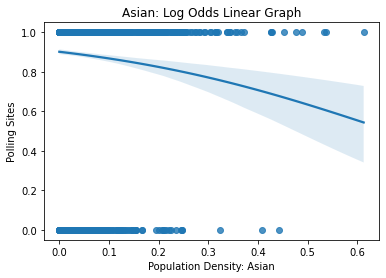

In [ ]:
asian = sns.regplot(x = df.iloc[:,13], y = df.iloc[:,16], data=df, logistic= True).set_title("Asian: Log Odds Linear Graph")
a = df.iloc[:,11]
poll = df.iloc[:,13]
model= smf.logit(formula="a~poll", data= df).fit()
model.summary()


In [ ]:

model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

OR   z-value      2.5%     97.5%
Intercept  1.210018  0.000021  1.108187  1.321206
poll       0.098925  0.000577  0.026501  0.369272

5. Mixed

Optimization terminated successfully.
         Current function value: 0.047058
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      m   No. Observations:                 2685
Model:                          Logit   Df Residuals:                     2683
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                  -50.51
Time:                        16:30:18   Log-Likelihood:                -126.35
converged:                       True   LL-Null:                       -2.4530
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2138      0.301    -10.694      0.000      -3.803      -2.625
poll          -0.0823      0.320     -0.257      0.797      -0.710       0.545
==============================================================================
"""

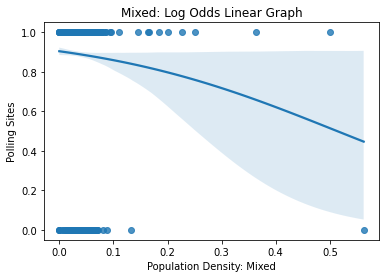

In [ ]:
mixed = sns.regplot(x = df.iloc[:,14], y = df.iloc[:,16], data=df, logistic= True).set_title("Mixed: Log Odds Linear Graph")
m = df.iloc[:,14]
poll = df.iloc[:,16]
model= smf.logit(formula="m~poll", data= df).fit()
model.summary()



In [ ]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds


OR       z-value      2.5%     97.5%
Intercept  0.040204  1.085456e-26  0.022308  0.072456
poll       0.920999  7.971222e-01  0.491776  1.724850

6. Other

Optimization terminated successfully.
         Current function value: 0.008909
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      o   No. Observations:                 2685
Model:                          Logit   Df Residuals:                     2683
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                  -9.381
Time:                        16:30:37   Log-Likelihood:                -23.920
converged:                       True   LL-Null:                       -2.3043
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5896      0.581     -7.904      0.000      -5.728      -3.452
poll          -0.3010      0.627     -0.480      0.631      -1.531       0.929
==============================================================================
"""

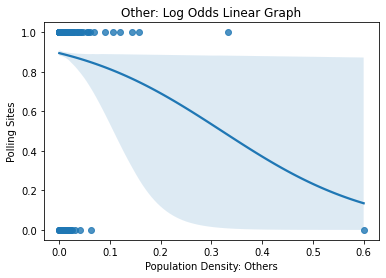

In [ ]:
other = sns.regplot(x = df.iloc[:,15], y = df.iloc[:,16], data=df, logistic= True).set_title("Other: Log Odds Linear Graph")
o = df.iloc[:,15]
poll = df.iloc[:,16]
model= smf.logit(formula="o~poll", data= df).fit()
model.summary()


In [ ]:

model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds


OR       z-value      2.5%     97.5%
Intercept  0.010157  2.691532e-15  0.003255  0.031695
poll       0.740050  6.313967e-01  0.216350  2.531433